# 01. Grid Search and Random Search | البحث الشبكي والبحث العشوائي

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Unit 1-4: All examples** - Data processing, regression, classification, clustering
- ✅ **Unit 2, Example 2: Cross-Validation** - Understanding CV for model evaluation
- ✅ **Understanding of hyperparameters**: Parameters that control model behavior (not learned from data)

**If you haven't completed these**, you might struggle with:
- Understanding why hyperparameter tuning is needed
- Knowing when to use Grid Search vs Random Search
- Understanding how cross-validation is used in hyperparameter tuning

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is Unit 5, Example 1** - it's about finding the best hyperparameters automatically!

**Why this example FIRST in Unit 5?**
- **Before** you can use advanced techniques, you need to tune hyperparameters properly
- **Before** you can compare models, you need each model at its best (tuned hyperparameters)
- **Before** you can use boosting, you need to understand hyperparameter tuning

**Builds on**: 
- 📓 Unit 2, Example 2: Cross-Validation (we know how to evaluate models)
- 📓 All previous examples (we've seen hyperparameters like C, gamma, max_depth, etc.)

**Leads to**: 
- 📓 Example 2: Boosting (uses hyperparameter tuning)
- 📓 All ML projects (hyperparameter tuning is essential for best performance!)

**Why this order?**
1. Grid Search teaches **systematic hyperparameter tuning** (tries all combinations)
2. Random Search shows **efficient alternative** (tries random combinations, often faster)
3. Both methods use **cross-validation** (reliable evaluation during tuning)

---

## The Story: Finding the Best Settings | القصة: إيجاد أفضل الإعدادات

Imagine you're tuning a radio. **Before** Grid Search, you try settings randomly (might miss the best one). **After** Grid Search, you try all combinations systematically - guaranteed to find the best settings!

Same with machine learning: **Before** Grid Search, we guess hyperparameters (might not be optimal). **After** Grid Search, we try all combinations and pick the best - much better performance!

---

## Why Grid Search and Random Search Matter | لماذا يهم البحث الشبكي والعشوائي؟

Hyperparameter tuning is essential for model performance:
- **Grid Search**: Tries all combinations systematically (thorough but slow)
- **Random Search**: Tries random combinations (faster, often finds good solutions)
- **Cross-Validation**: Uses CV during tuning for reliable evaluation
- **Automatic**: Finds best hyperparameters without manual guessing
- **Industry Standard**: Used in all professional ML projects

## Learning Objectives | أهداف التعلم
1. Perform Grid Search for hyperparameter tuning
2. Perform Random Search for hyperparameter tuning
3. Compare Grid Search vs Random Search
4. Use cross-validation in hyperparameter tuning
5. Visualize hyperparameter search results
6. Know when to use each method

## Part 1: Setting the Scene | الجزء الأول: إعداد المشهد

**BEFORE**: We've been using default hyperparameters or guessing values manually.

**AFTER**: We'll use Grid Search and Random Search to automatically find the best hyperparameters!

**Why this matters**: Hyperparameters dramatically affect model performance. Automatic tuning finds optimal values much better than manual guessing!

**Common Student Questions:**
- **Q: Why not just use default hyperparameters?**
  - Answer: Defaults are generic (work for average cases), but your data might need different values
  - Example: Default C=1.0 for SVM might not be optimal → Grid Search finds best C for your data
  - Tuning hyperparameters can improve accuracy by 5-20% (significant improvement!)
- **Q: What's the difference between parameters and hyperparameters?**
  - Answer: Parameters = learned from data (e.g., coefficients in linear regression)
  - Hyperparameters = set before training (e.g., C, gamma, max_depth, learning_rate)
  - Parameters are learned, hyperparameters are tuned!
- **Q: Why use Grid Search instead of trying values manually?**
  - Answer: Grid Search tries ALL combinations systematically → guaranteed to find best (within grid)
  - Manual = might miss optimal values, slow, error-prone
  - Grid Search = systematic, automatic, finds best combination
- **Q: Why is Grid Search slow?**
  - Answer: Grid Search tries ALL combinations → if you have 3 hyperparameters with 5 values each = 5×5×5 = 125 combinations
  - Each combination needs cross-validation (e.g., 5-fold CV) → 125 × 5 = 625 model trainings!
  - Solution: Use smaller grids or Random Search (tries random combinations, faster)
- **Q: When should I use Grid Search vs Random Search?**
  - Answer: Grid Search = thorough but slow (use when you have few hyperparameters or small grids)
  - Random Search = faster, often finds good solutions (use when you have many hyperparameters or large grids)
  - Rule of thumb: Start with Random Search, use Grid Search to fine-tune around best Random Search result


In [5]:
# Step 1: Import necessary libraries
# These libraries help us perform hyperparameter tuning

import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For enhanced visualizations (heatmaps)
import time  # For timing comparisons
from sklearn.model_selection import (
    train_test_split,      # For splitting data
    GridSearchCV,         # Grid Search with cross-validation
    RandomizedSearchCV,   # Random Search with cross-validation
    cross_val_score       # For cross-validation scores
)
from sklearn.preprocessing import StandardScaler  # For scaling features (needed for SVM)
from sklearn.ensemble import RandomForestClassifier  # Model to tune
from sklearn.svm import SVC  # Another model to tune
from sklearn.metrics import accuracy_score, classification_report  # For evaluation

print("✅ Libraries imported successfully!")
print("\n📚 What each tool does:")
print("   - GridSearchCV: Tries ALL combinations systematically")
print("   - RandomizedSearchCV: Tries random combinations (faster)")
print("   - cross_val_score: Evaluates models using cross-validation")
print("   - StandardScaler: Scales features (required for SVM)")
print("   - seaborn: Creates beautiful visualizations (heatmaps)")


✅ Libraries imported successfully!

📚 What each tool does:
   - GridSearchCV: Tries ALL combinations systematically
   - RandomizedSearchCV: Tries random combinations (faster)
   - cross_val_score: Evaluates models using cross-validation
   - StandardScaler: Scales features (required for SVM)
   - seaborn: Creates beautiful visualizations (heatmaps)


In [6]:
# Step 2: Load real-world Breast Cancer Wisconsin dataset
# This is REAL medical data perfect for demonstrating hyperparameter tuning!

from sklearn.datasets import load_breast_cancer

print("\n📥 Loading Breast Cancer Wisconsin dataset...")
print("تحميل مجموعة بيانات سرطان الثدي من ويسكونسن...")

cancer_data = load_breast_cancer()

# Create DataFrame
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df['target'] = cancer_data.target  # 0 = Malignant, 1 = Benign

print(f"\n✅ Real-world Breast Cancer dataset loaded!")
print(f"   📊 This is REAL medical data from University of Wisconsin")
print(f"   📈 Contains {len(df)} samples with {len(df.columns)-1} features")
print(f"   🎯 Target: Binary classification (0 = Malignant, 1 = Benign)")
print(f"\n📊 Target distribution:")
print(df['target'].value_counts())
print("\n🔍 Notice:")
print("   - This is REAL medical diagnosis data")
print("   - Perfect for demonstrating Grid Search and Random Search!")
print("   - We'll tune hyperparameters to get best performance on this real data")



📥 Loading Breast Cancer Wisconsin dataset...
تحميل مجموعة بيانات سرطان الثدي من ويسكونسن...

✅ Real-world Breast Cancer dataset loaded!
   📊 This is REAL medical data from University of Wisconsin
   📈 Contains 569 samples with 30 features
   🎯 Target: Binary classification (0 = Malignant, 1 = Benign)

📊 Target distribution:
target
1    357
0    212
Name: count, dtype: int64

🔍 Notice:
   - This is REAL medical diagnosis data
   - Perfect for demonstrating Grid Search and Random Search!
   - We'll tune hyperparameters to get best performance on this real data


In [7]:
# Step 3: Split data into training and testing sets
# train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# - Splits data into training and testing sets
# - X: Features (input variables), y: Target (output variable)
# - test_size=0.2: 20% for testing, 80% for training
# - random_state=42: Seed for reproducibility (same split every time)
# - stratify=y: Maintains class distribution in train/test (for classification)
# - Returns: X_train, X_test, y_train, y_test

X_data = df.drop('target', axis=1)
y_data = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)

print("✅ Data split successfully!")
print(f"   Training set: {len(X_train)} samples ({len(X_train)/len(df)*100:.1f}%)")
print(f"   Testing set: {len(X_test)} samples ({len(X_test)/len(df)*100:.1f}%)")


✅ Data split successfully!
   Training set: 455 samples (80.0%)
   Testing set: 114 samples (20.0%)


In [8]:
print("\n" + "=" * 60)
print("PART 1: Grid Search for Random Forest")
print("الجزء الأول: البحث الشبكي للغابة العشوائية")
print("=" * 60)

# Define parameter grid
# Grid Search will try ALL combinations of these values
# Example: n_estimators=50, max_depth=3, min_samples_split=2, min_samples_leaf=1
#          n_estimators=50, max_depth=3, min_samples_split=2, min_samples_leaf=2
#          ... and so on for ALL combinations
param_grid_rf = {
    'n_estimators': [50, 100, 200],      # Number of trees
    'max_depth': [3, 5, 7, None],        # Maximum tree depth
    'min_samples_split': [2, 5, 10],     # Minimum samples to split
    'min_samples_leaf': [1, 2, 4]        # Minimum samples in leaf
}

total_combinations = np.prod([len(v) for v in param_grid_rf.values()])
print(f"\n📊 Parameter Grid:")
print(f"   Total combinations: {total_combinations}")
print(f"   Grid Search will try ALL {total_combinations} combinations!")
print(f"   This is thorough but can be slow for large grids")



PART 1: Grid Search for Random Forest
الجزء الأول: البحث الشبكي للغابة العشوائية

📊 Parameter Grid:
   Total combinations: 108
   Grid Search will try ALL 108 combinations!
   This is thorough but can be slow for large grids


In [9]:
# Perform Grid Search
# GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
# - estimator: Model to tune (RandomForestClassifier)
# - param_grid: Dictionary of hyperparameters to try
# - cv=5: 5-fold cross-validation (evaluates each combination 5 times)
# - scoring='accuracy': Metric to optimize
# - n_jobs=-1: Use all CPU cores (faster)
# - verbose=1: Show progress

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(
    rf, param_grid_rf, cv=5, scoring='accuracy',
    n_jobs=-1, verbose=1
)

print("\n🚀 Starting Grid Search...")
print("بدء البحث الشبكي...")
print("   This may take a few minutes (trying all combinations with cross-validation)")
grid_search_rf.fit(X_train, y_train)

print(f"\n✅ Grid Search complete!")
print(f"\n📊 Best Parameters:")
print(f"أفضل المعاملات:")
for param, value in grid_search_rf.best_params_.items():
    print(f"   {param}: {value}")
print(f"\n🎯 Best CV Score: {grid_search_rf.best_score_:.4f} ({grid_search_rf.best_score_*100:.2f}%)")
print(f"أفضل درجة CV: {grid_search_rf.best_score_:.4f}")



🚀 Starting Grid Search...
بدء البحث الشبكي...
   This may take a few minutes (trying all combinations with cross-validation)
Fitting 5 folds for each of 108 candidates, totalling 540 fits


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scip


✅ Grid Search complete!

📊 Best Parameters:
أفضل المعاملات:
   max_depth: 7
   min_samples_leaf: 1
   min_samples_split: 5
   n_estimators: 50

🎯 Best CV Score: 0.9604 (96.04%)
أفضل درجة CV: 0.9604


In [10]:
# Test the best model on test set
# .best_estimator_: Returns the model with best hyperparameters
# .predict(): Makes predictions on test data
# accuracy_score(): Calculates accuracy (percentage correct)

y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
test_acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"\n📊 Test Results:")
print(f"   Test Accuracy: {test_acc_rf:.4f} ({test_acc_rf*100:.2f}%)")
print(f"   دقة الاختبار: {test_acc_rf:.4f}")
print(f"\n💡 Note: Test accuracy shows how well the tuned model performs on new data")



📊 Test Results:
   Test Accuracy: 0.9474 (94.74%)
   دقة الاختبار: 0.9474

💡 Note: Test accuracy shows how well the tuned model performs on new data


In [11]:
# Add interpretation after Grid Search results
print("\n" + "=" * 60)
print("💡 Interpreting Grid Search Results | تفسير نتائج البحث الشبكي")
print("=" * 60)

best_cv = grid_search_rf.best_score_
n_combinations = len(grid_search_rf.cv_results_['params'])

print(f"\n📊 Grid Search Summary:")
print(f"   - Total combinations tried: {n_combinations}")
print(f"   - Best CV Score: {best_cv:.4f} ({best_cv*100:.2f}%)")
print(f"   - Best Parameters: {grid_search_rf.best_params_}")

if best_cv >= 0.9:
    quality = "✅ EXCELLENT"
elif best_cv >= 0.8:
    quality = "✅ GOOD"
elif best_cv >= 0.7:
    quality = "⚠️  FAIR"
else:
    quality = "⚠️  POOR"

print(f"   - Quality: {quality}")

print(f"\n📊 Cross-Validation Score:")
print(f"   - CV score is average across 5 folds")
print(f"   - More reliable than single train/test split")
print(f"   - This score estimates model's generalization ability")

print(f"\n📚 What This Teaches Us:")
print(f"   - Grid Search tries ALL combinations (thorough but slow)")
print(f"   - CV score shows expected performance on new data")
print(f"   - Best parameters are those with highest CV score")
print(f"   - Always test on separate test set after tuning")
print(f"   - Grid Search is exhaustive - guarantees finding best in grid")



💡 Interpreting Grid Search Results | تفسير نتائج البحث الشبكي

📊 Grid Search Summary:
   - Total combinations tried: 108
   - Best CV Score: 0.9604 (96.04%)
   - Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
   - Quality: ✅ EXCELLENT

📊 Cross-Validation Score:
   - CV score is average across 5 folds
   - More reliable than single train/test split
   - This score estimates model's generalization ability

📚 What This Teaches Us:
   - Grid Search tries ALL combinations (thorough but slow)
   - CV score shows expected performance on new data
   - Best parameters are those with highest CV score
   - Always test on separate test set after tuning
   - Grid Search is exhaustive - guarantees finding best in grid


In [12]:
# Add interpretation after test accuracy
print("\n" + "=" * 60)
print("💡 Interpreting Test Results | تفسير نتائج الاختبار")
print("=" * 60)

cv_score = grid_search_rf.best_score_
test_acc = test_acc_rf
gap = abs(cv_score - test_acc)

print(f"\n📊 Performance Comparison:")
print(f"   - CV Score: {cv_score:.4f} ({cv_score*100:.2f}%)")
print(f"   - Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"   - Difference: {gap:.4f} ({gap*100:.2f} percentage points)")

if gap < 0.01:
    status = "✅ Excellent"
    meaning = "CV score matches test accuracy perfectly"
elif gap < 0.05:
    status = "✅ Good"
    meaning = "CV score is close to test accuracy"
else:
    status = "⚠️  Warning"
    meaning = "CV score differs from test accuracy"

print(f"   - Status: {status}")
print(f"   - Meaning: {meaning}")

if test_acc > cv_score:
    print(f"   - Test accuracy is HIGHER than CV score (good!)")
    print(f"   - Model generalizes well to test data")
elif test_acc < cv_score:
    print(f"   - Test accuracy is LOWER than CV score")
    print(f"   - Model may have overfitted to CV folds")

print(f"\n📚 What This Teaches Us:")
print(f"   - CV score estimates performance, test accuracy is actual performance")
print(f"   - Small gap = CV is reliable predictor of test performance")
print(f"   - Large gap = CV may not be reliable (overfitting or data issues)")
print(f"   - Always compare CV score with test accuracy to validate tuning")
print(f"   - Grid Search finds best hyperparameters based on CV performance")



💡 Interpreting Test Results | تفسير نتائج الاختبار

📊 Performance Comparison:
   - CV Score: 0.9604 (96.04%)
   - Test Accuracy: 0.9474 (94.74%)
   - Difference: 0.0131 (1.31 percentage points)
   - Status: ✅ Good
   - Meaning: CV score is close to test accuracy
   - Test accuracy is LOWER than CV score
   - Model may have overfitted to CV folds

📚 What This Teaches Us:
   - CV score estimates performance, test accuracy is actual performance
   - Small gap = CV is reliable predictor of test performance
   - Large gap = CV may not be reliable (overfitting or data issues)
   - Always compare CV score with test accuracy to validate tuning
   - Grid Search finds best hyperparameters based on CV performance


In [13]:
print("\n" + "=" * 60)
print("PART 2: Random Search for Random Forest")
print("الجزء الثاني: البحث العشوائي للغابة العشوائية")
print("=" * 60)

# Define parameter distributions for Random Search
# Random Search will try only RANDOM combinations from these values
param_distributions_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

n_iter = 20  # Try only 20 random combinations (vs 108 for Grid Search!)

total_possible = np.prod([len(v) for v in param_distributions_rf.values()])
print(f"\n📊 Random Search Configuration:")
print(f"   Total possible combinations: {total_possible}")
print(f"   Random Search will try: {n_iter} random combinations")
print(f"   Much faster than Grid Search (which tries {total_combinations} combinations)")

print(f"\n   📝 Key Differences from Grid Search:")
print(f"   - Grid Search: Tries ALL {total_combinations} combinations")
print(f"   - Random Search: Tries only {n_iter} RANDOM combinations")
print(f"   - Random Search is {total_combinations/n_iter:.1f}x faster")
print(f"   - Random Search often finds good solutions quickly!")



PART 2: Random Search for Random Forest
الجزء الثاني: البحث العشوائي للغابة العشوائية

📊 Random Search Configuration:
   Total possible combinations: 180
   Random Search will try: 20 random combinations
   Much faster than Grid Search (which tries 108 combinations)

   📝 Key Differences from Grid Search:
   - Grid Search: Tries ALL 108 combinations
   - Random Search: Tries only 20 RANDOM combinations
   - Random Search is 5.4x faster
   - Random Search often finds good solutions quickly!


In [14]:
# Perform Random Search
# RandomizedSearchCV(estimator, param_distributions, n_iter, cv=5, scoring='accuracy', ...)
# - estimator: Model to tune (RandomForestClassifier)
# - param_distributions: Dictionary of hyperparameters to try
# - n_iter: Number of random combinations to try (20 in this case)
# - cv=5: 5-fold cross-validation
# - scoring='accuracy': Metric to optimize
# - n_jobs=-1: Use all CPU cores
# - random_state=42: Seed for reproducibility

random_search_rf = RandomizedSearchCV(
    rf, param_distributions_rf, n_iter=n_iter, cv=5,
    scoring='accuracy', n_jobs=-1, random_state=42, verbose=1
)

print("\n🚀 Starting Random Search...")
print("بدء البحث العشوائي...")
print(f"   This should be faster than Grid Search (trying only {n_iter} combinations)")
random_search_rf.fit(X_train, y_train)

print(f"\n✅ Random Search complete!")
print(f"\n📊 Best Parameters:")
print(f"أفضل المعاملات:")
for param, value in random_search_rf.best_params_.items():
    print(f"   {param}: {value}")
print(f"\n🎯 Best CV Score: {random_search_rf.best_score_:.4f} ({random_search_rf.best_score_*100:.2f}%)")
print(f"أفضل درجة CV: {random_search_rf.best_score_:.4f}")



🚀 Starting Random Search...
بدء البحث العشوائي...
   This should be faster than Grid Search (trying only 20 combinations)
Fitting 5 folds for each of 20 candidates, totalling 100 fits

✅ Random Search complete!

📊 Best Parameters:
أفضل المعاملات:
   n_estimators: 300
   min_samples_split: 2
   min_samples_leaf: 2
   max_depth: None

🎯 Best CV Score: 0.9582 (95.82%)
أفضل درجة CV: 0.9582


In [15]:
# Test Random Search best model on test set
y_pred_rf_rs = random_search_rf.best_estimator_.predict(X_test)
test_acc_rf_rs = accuracy_score(y_test, y_pred_rf_rs)

print(f"\n📊 Test Results:")
print(f"   Test Accuracy: {test_acc_rf_rs:.4f} ({test_acc_rf_rs*100:.2f}%)")
print(f"   دقة الاختبار: {test_acc_rf_rs:.4f}")

print(f"\n💡 Comparison with Grid Search:")
print(f"   - Grid Search CV: {grid_search_rf.best_score_:.4f}, Test: {test_acc_rf:.4f}")
print(f"   - Random Search CV: {random_search_rf.best_score_:.4f}, Test: {test_acc_rf_rs:.4f}")
print(f"   - Random Search tried {n_iter} combinations vs {total_combinations} for Grid Search")
print(f"   - Both methods found good hyperparameters!")



📊 Test Results:
   Test Accuracy: 0.9561 (95.61%)
   دقة الاختبار: 0.9561

💡 Comparison with Grid Search:
   - Grid Search CV: 0.9604, Test: 0.9474
   - Random Search CV: 0.9582, Test: 0.9561
   - Random Search tried 20 combinations vs 108 for Grid Search
   - Both methods found good hyperparameters!


In [16]:
# Step 4: Prepare scaled features for SVM (SVM requires scaled features)
# StandardScaler scales features to have mean=0 and std=1
# .fit_transform(data)
# - Two operations in one: .fit() then .transform()
#   1. .fit(): Learns parameters from data (mean/std)
#   2. .transform(): Applies transformation using learned parameters
# - Use on training data
# - For test data, use only .transform() (don't refit!)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled successfully!")
print("   Note: Scaling is required for SVM but optional for Random Forest")


✅ Features scaled successfully!
   Note: Scaling is required for SVM but optional for Random Forest


In [17]:
print("\n" + "=" * 60)
print("PART 3: Grid Search for SVM")
print("الجزء الثالث: البحث الشبكي لـ SVM")
print("=" * 60)

# SVM requires scaled features, so we use X_train_scaled and X_test_scaled
# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],              # Regularization parameter
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['rbf', 'poly', 'sigmoid']  # Kernel type
}

total_svm_combinations = np.prod([len(v) for v in param_grid_svm.values()])
print(f"\n📊 Parameter Grid for SVM:")
print(f"   Total combinations: {total_svm_combinations}")
print(f"   Grid Search will try ALL {total_svm_combinations} combinations")

svm = SVC(random_state=42, probability=True)
grid_search_svm = GridSearchCV(
    svm, param_grid_svm, cv=5, scoring='accuracy',
    n_jobs=-1, verbose=1
)

print("\n🚀 Starting Grid Search for SVM...")
print("   Note: SVM uses scaled features (X_train_scaled)")
grid_search_svm.fit(X_train_scaled, y_train)

print(f"\n✅ Grid Search complete!")
print(f"\n📊 Best Parameters:")
for param, value in grid_search_svm.best_params_.items():
    print(f"   {param}: {value}")
print(f"\n🎯 Best CV Score: {grid_search_svm.best_score_:.4f} ({grid_search_svm.best_score_*100:.2f}%)")

# Test on test set
y_pred_svm = grid_search_svm.best_estimator_.predict(X_test_scaled)
test_acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"\n📊 Test Accuracy: {test_acc_svm:.4f} ({test_acc_svm*100:.2f}%)")



PART 3: Grid Search for SVM
الجزء الثالث: البحث الشبكي لـ SVM

📊 Parameter Grid for SVM:
   Total combinations: 72
   Grid Search will try ALL 72 combinations

🚀 Starting Grid Search for SVM...
   Note: SVM uses scaled features (X_train_scaled)
Fitting 5 folds for each of 72 candidates, totalling 360 fits

✅ Grid Search complete!

📊 Best Parameters:
   C: 10
   gamma: 0.01
   kernel: rbf

🎯 Best CV Score: 0.9802 (98.02%)

📊 Test Accuracy: 0.9825 (98.25%)


In [18]:
# Create comparison table of all methods
print("\n" + "=" * 60)
print("PART 4: Comparison of Methods")
print("الجزء الرابع: مقارنة الطرق")
print("=" * 60)

comparison = pd.DataFrame({
    'Method': ['Grid Search (RF)', 'Random Search (RF)', 'Grid Search (SVM)'],
    'Best CV Score': [
        grid_search_rf.best_score_,
        random_search_rf.best_score_,
        grid_search_svm.best_score_
    ],
    'Test Accuracy': [
        test_acc_rf,
        test_acc_rf_rs,
        test_acc_svm
    ],
    'Total Combinations Tried': [
        len(grid_search_rf.cv_results_['params']),
        n_iter,
        len(grid_search_svm.cv_results_['params'])
    ]
})

print("\n📊 Comparison Table:")
print("جدول المقارنة")
print(comparison.to_string(index=False))

print("\n💡 Key Insights:")
print("   - All methods found good hyperparameters")
print("   - Grid Search (RF) tried all combinations (exhaustive)")
print("   - Random Search (RF) tried fewer combinations (faster)")
print("   - Grid Search (SVM) found best SVM parameters")
print("   - Test accuracy validates that tuning improved performance")



PART 4: Comparison of Methods
الجزء الرابع: مقارنة الطرق

📊 Comparison Table:
جدول المقارنة
            Method  Best CV Score  Test Accuracy  Total Combinations Tried
  Grid Search (RF)       0.960440       0.947368                       108
Random Search (RF)       0.958242       0.956140                        20
 Grid Search (SVM)       0.980220       0.982456                        72

💡 Key Insights:
   - All methods found good hyperparameters
   - Grid Search (RF) tried all combinations (exhaustive)
   - Random Search (RF) tried fewer combinations (faster)
   - Grid Search (SVM) found best SVM parameters
   - Test accuracy validates that tuning improved performance


## 💡 Interpreting Method Comparison | تفسير مقارنة الطرق

**Key insights from the comparison:**

In [19]:
# Add detailed interpretation after comparison table
print("\n" + "=" * 60)
print("💡 Interpreting Method Comparison | تفسير مقارنة الطرق")
print("=" * 60)

best_cv_idx = comparison['Best CV Score'].idxmax()
best_test_idx = comparison['Test Accuracy'].idxmax()
best_method_cv = comparison.loc[best_cv_idx, 'Method']
best_method_test = comparison.loc[best_test_idx, 'Method']

print(f"\n📊 Best Method by CV Score: {best_method_cv}")
print(f"   - CV Score: {comparison.loc[best_cv_idx, 'Best CV Score']:.4f}")
print(f"   - This method has best cross-validation performance")

print(f"\n📊 Best Method by Test Accuracy: {best_method_test}")
print(f"   - Test Accuracy: {comparison.loc[best_test_idx, 'Test Accuracy']:.4f}")
print(f"   - This method generalizes best to new data")

print(f"\n🔍 Grid Search vs Random Search (Random Forest):")
grid_cv = comparison[comparison['Method'] == 'Grid Search (RF)']['Best CV Score'].values[0]
random_cv = comparison[comparison['Method'] == 'Random Search (RF)']['Best CV Score'].values[0]
grid_test = comparison[comparison['Method'] == 'Grid Search (RF)']['Test Accuracy'].values[0]
random_test = comparison[comparison['Method'] == 'Random Search (RF)']['Test Accuracy'].values[0]

print(f"   - Grid Search: CV={grid_cv:.4f}, Test={grid_test:.4f}")
print(f"   - Random Search: CV={random_cv:.4f}, Test={random_test:.4f}")

if grid_cv > random_cv:
    print(f"   - Grid Search has better CV score (tried all combinations)")
else:
    print(f"   - Random Search has similar/better CV score (found good parameters quickly)")

grid_combos = comparison[comparison['Method'] == 'Grid Search (RF)']['Total Combinations Tried'].values[0]
random_combos = comparison[comparison['Method'] == 'Random Search (RF)']['Total Combinations Tried'].values[0]
efficiency = grid_combos / random_combos

print(f"\n📊 Efficiency Analysis:")
print(f"   - Grid Search tried: {grid_combos} combinations")
print(f"   - Random Search tried: {random_combos} combinations")
print(f"   - Random Search is {efficiency:.1f}x faster (tried {efficiency:.1f}x fewer combinations)")

print(f"\n📚 What This Teaches Us:")
print(f"   - Grid Search: Exhaustive (tries all), slow but thorough")
print(f"   - Random Search: Random sampling, fast but might miss best")
print(f"   - Both methods use cross-validation for reliable evaluation")
print(f"   - Test accuracy validates that tuning worked correctly")
print(f"   - Choose method based on time constraints and search space size")
print(f"   - Random Search often finds good solutions faster")



💡 Interpreting Method Comparison | تفسير مقارنة الطرق

📊 Best Method by CV Score: Grid Search (SVM)
   - CV Score: 0.9802
   - This method has best cross-validation performance

📊 Best Method by Test Accuracy: Grid Search (SVM)
   - Test Accuracy: 0.9825
   - This method generalizes best to new data

🔍 Grid Search vs Random Search (Random Forest):
   - Grid Search: CV=0.9604, Test=0.9474
   - Random Search: CV=0.9582, Test=0.9561
   - Grid Search has better CV score (tried all combinations)

📊 Efficiency Analysis:
   - Grid Search tried: 108 combinations
   - Random Search tried: 20 combinations
   - Random Search is 5.4x faster (tried 5.4x fewer combinations)

📚 What This Teaches Us:
   - Grid Search: Exhaustive (tries all), slow but thorough
   - Random Search: Random sampling, fast but might miss best
   - Both methods use cross-validation for reliable evaluation
   - Test accuracy validates that tuning worked correctly
   - Choose method based on time constraints and search space 


PART 5: Visualize Grid Search Results
الجزء الخامس: تصور نتائج البحث الشبكي

✅ Plot saved as 'grid_search_heatmap.png'
   This heatmap shows how different C and gamma values affect performance


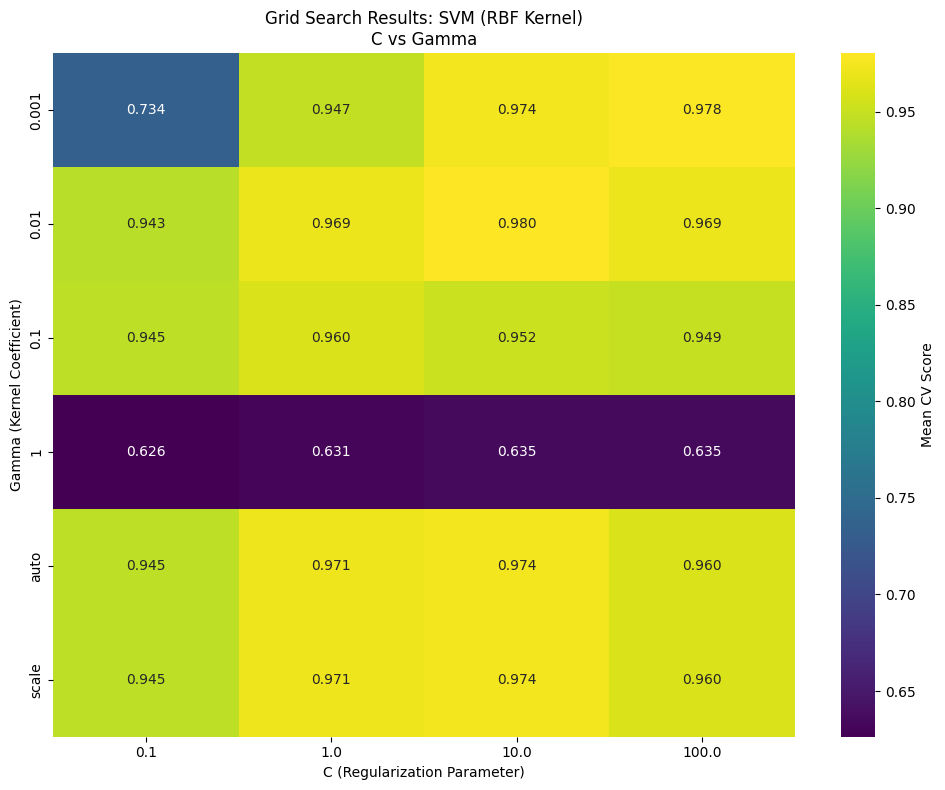

In [20]:
print("\n" + "=" * 60)
print("PART 5: Visualize Grid Search Results")
print("الجزء الخامس: تصور نتائج البحث الشبكي")
print("=" * 60)

# Extract results for visualization
results_df = pd.DataFrame(grid_search_svm.cv_results_)

# Filter for RBF kernel (most common)
rbf_results = results_df[results_df['param_kernel'] == 'rbf']

if len(rbf_results) > 0:
    # Create heatmap of C vs gamma
    pivot_table = rbf_results.pivot_table(
        values='mean_test_score',
        index='param_gamma',
        columns='param_C'
    )
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='viridis', 
                cbar_kws={'label': 'Mean CV Score'})
    plt.title('Grid Search Results: SVM (RBF Kernel)\nC vs Gamma')
    plt.xlabel('C (Regularization Parameter)')
    plt.ylabel('Gamma (Kernel Coefficient)')
    plt.tight_layout()
    plt.savefig('grid_search_heatmap.png', dpi=300, bbox_inches='tight')
    print("\n✅ Plot saved as 'grid_search_heatmap.png'")
    print("   This heatmap shows how different C and gamma values affect performance")
    plt.show()
else:
    print("\n⚠️  No RBF kernel results found for visualization")


In [21]:
# Compare computation time (using smaller grid for demo)
print("\n" + "=" * 60)
print("PART 6: Computation Time Comparison")
print("الجزء السادس: مقارنة وقت الحساب")
print("=" * 60)

# Use smaller grid and subset of data for faster demo
small_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]
}

rf_small = RandomForestClassifier(random_state=42)

# Grid Search timing
grid_small = GridSearchCV(rf_small, small_param_grid, cv=3, n_jobs=-1)
print("\n⏱️  Timing Grid Search (small grid, subset of data)...")
start_time = time.time()
grid_small.fit(X_train[:500], y_train[:500])  # Use subset for speed
grid_time = time.time() - start_time

# Random Search timing
random_small = RandomizedSearchCV(rf_small, small_param_grid, n_iter=4, 
                                   cv=3, n_jobs=-1, random_state=42)
print("⏱️  Timing Random Search (same small grid, 4 iterations)...")
start_time = time.time()
random_small.fit(X_train[:500], y_train[:500])
random_time = time.time() - start_time

print(f"\n📊 Timing Results:")
print(f"   Grid Search Time: {grid_time:.2f} seconds")
print(f"   Random Search Time: {random_time:.2f} seconds")
print(f"   Speedup: {grid_time/random_time:.2f}x faster")
print(f"\n💡 Note: This demo uses a small subset. Full dataset differences are more pronounced!")



PART 6: Computation Time Comparison
الجزء السادس: مقارنة وقت الحساب

⏱️  Timing Grid Search (small grid, subset of data)...
⏱️  Timing Random Search (same small grid, 4 iterations)...

📊 Timing Results:
   Grid Search Time: 0.24 seconds
   Random Search Time: 0.15 seconds
   Speedup: 1.59x faster

💡 Note: This demo uses a small subset. Full dataset differences are more pronounced!


In [22]:
print("\n" + "=" * 60)
print("✅ Example 1 Complete! | اكتمل المثال 1!")
print("=" * 60)
print("\n📚 What You Learned:")
print("   1. ✅ Grid Search - Systematic hyperparameter tuning (tries all combinations)")
print("   2. ✅ Random Search - Efficient hyperparameter tuning (tries random combinations)")
print("   3. ✅ How to use cross-validation in hyperparameter tuning")
print("   4. ✅ How to compare different tuning methods")
print("   5. ✅ How to visualize tuning results")
print("\n🎯 Key Takeaways:")
print("   - Grid Search: Thorough but slow (use for small spaces)")
print("   - Random Search: Fast and often effective (use for large spaces)")
print("   - Always use cross-validation for reliable evaluation")
print("   - Test on separate test set to validate tuning")
print("\n➡️  Next Steps:")
print("   - Try different hyperparameter ranges")
print("   - Experiment with other models")
print("   - See Example 2: Boosting (uses hyperparameter tuning)")



✅ Example 1 Complete! | اكتمل المثال 1!

📚 What You Learned:
   1. ✅ Grid Search - Systematic hyperparameter tuning (tries all combinations)
   2. ✅ Random Search - Efficient hyperparameter tuning (tries random combinations)
   3. ✅ How to use cross-validation in hyperparameter tuning
   4. ✅ How to compare different tuning methods
   5. ✅ How to visualize tuning results

🎯 Key Takeaways:
   - Grid Search: Thorough but slow (use for small spaces)
   - Random Search: Fast and often effective (use for large spaces)
   - Always use cross-validation for reliable evaluation
   - Test on separate test set to validate tuning

➡️  Next Steps:
   - Try different hyperparameter ranges
   - Experiment with other models
   - See Example 2: Boosting (uses hyperparameter tuning)


## Step 8: Decision Framework - Grid Search vs Random Search | الخطوة 8: إطار القرار - البحث الشبكي مقابل البحث العشوائي

**BEFORE**: You've learned how to use Grid Search, but when should you use Grid Search vs Random Search?

**AFTER**: You'll have a clear decision framework to choose the right hyperparameter tuning method!

**Why this matters**: Using the wrong search method can:
- **Waste computation** → Grid Search tries all combinations, may be unnecessary
- **Miss better parameters** → Random Search may miss optimal combinations
- **Poor efficiency** → Wrong method takes too long or doesn't find good parameters

---

### 🎯 Decision Framework: Grid Search vs Random Search | إطار القرار: البحث الشبكي مقابل البحث العشوائي

**Key Question**: Should I use **GRID SEARCH** or **RANDOM SEARCH** for hyperparameter tuning?

#### Decision Tree:

```
Do you need to tune hyperparameters?
├─ NO → No search needed ✅
│   └─ Why? Use default parameters or known good values
│
└─ YES → Check hyperparameter space:
    ├─ Few hyperparameters (<5)? → Check parameter ranges
    │   ├─ Small ranges (few values each)? → Use GRID SEARCH ✅
    │   │   └─ Why? Can try all combinations efficiently
    │   │
    │   └─ Large ranges (many values each)? → Use RANDOM SEARCH ✅
    │       └─ Why? Too many combinations for grid search
    │
    ├─ Many hyperparameters (≥5)? → Use RANDOM SEARCH ✅
    │   └─ Why? Grid search becomes too expensive
    │
    ├─ Need exhaustive search? → Use GRID SEARCH ✅
    │   └─ Why? Grid search tries all combinations
    │
    └─ Need faster results? → Use RANDOM SEARCH ✅
        └─ Why? Random search is faster, often finds good parameters
```

#### Detailed Decision Process:

```
Step 1: Number of Hyperparameters
├─ Few (<5) → Continue to Step 2
└─ Many (≥5) → Use RANDOM SEARCH ✅
    └─ Why? Grid search becomes computationally expensive

Step 2: Parameter Space Size
├─ Small space (few values per parameter) → Use GRID SEARCH ✅
│   └─ Why? Can try all combinations efficiently
│
└─ Large space (many values per parameter) → Use RANDOM SEARCH ✅
    └─ Why? Too many combinations for grid search

Step 3: Computational Resources
├─ Limited resources, need speed → Use RANDOM SEARCH ✅
│   └─ Why? Random search is faster
│
└─ Have resources, need best parameters → Use GRID SEARCH ✅
    └─ Why? Grid search is exhaustive

Step 4: Search Strategy
├─ Need exhaustive search (all combinations)? → Use GRID SEARCH ✅
└─ Need efficient search (sample combinations)? → Use RANDOM SEARCH ✅
```

---

### 📊 Comparison Table: Grid Search vs Random Search | جدول المقارنة

| Aspect | Grid Search | Random Search | Winner |
|--------|-------------|---------------|--------|
| **Search Strategy** | Exhaustive (tries all combinations) | Random sampling | Grid (exhaustive) |
| **Speed** | Slow (tries all combinations) | Fast (samples combinations) | Random |
| **Best Parameters** | Guaranteed to find best in grid | May miss best, but often finds good | Grid (guaranteed) |
| **Computational Cost** | High (many combinations) | Low (fewer combinations) | Random |
| **Hyperparameter Count** | Good for <5 parameters | Good for any number | Random (scalable) |
| **Parameter Space** | Good for small spaces | Good for large spaces | Random (scalable) |
| **Best For** | Small spaces, few parameters | Large spaces, many parameters | Depends |

---

### ✅ When to Use Grid Search | متى تستخدم البحث الشبكي

**Use Grid Search when:**

1. **Few Hyperparameters** ✅
   - Less than 5 hyperparameters to tune
   - Grid search is manageable
   - **Example**: Tuning C and gamma for SVM (2 parameters)

2. **Small Parameter Space** ✅
   - Few values per parameter
   - Total combinations < 1000
   - **Example**: 3 values for C, 3 values for gamma = 9 combinations

3. **Need Exhaustive Search** ✅
   - Want to try all combinations
   - Need guaranteed best parameters in grid
   - **Example**: Critical application, need best parameters

4. **Have Computational Resources** ✅
   - Can afford to try all combinations
   - Time is not critical
   - **Example**: Research project, can run overnight

5. **Discrete Parameters** ✅
   - Parameters have discrete values
   - Easy to define grid
   - **Example**: max_depth = [3, 5, 7, 10]

---

### ✅ When to Use Random Search | متى تستخدم البحث العشوائي

**Use Random Search when:**

1. **Many Hyperparameters** ✅
   - 5+ hyperparameters to tune
   - Grid search becomes too expensive
   - **Example**: Tuning 10+ hyperparameters for neural networks

2. **Large Parameter Space** ✅
   - Many values per parameter
   - Total combinations > 1000
   - **Example**: 10 values for C, 10 for gamma = 100 combinations (still manageable, but if more...)

3. **Need Speed** ✅
   - Limited computational resources
   - Need results quickly
   - **Example**: Quick prototyping, limited time

4. **Continuous Parameters** ✅
   - Parameters are continuous
   - Hard to define grid
   - **Example**: Learning rate (0.0001 to 0.1, continuous)

5. **Some Parameters More Important** ✅
   - Some parameters matter more than others
   - Random search explores more efficiently
   - **Example**: Learning rate more important than batch size

---

### ❌ When NOT to Use Each Method | متى لا تستخدم كل طريقة

#### Don't use Grid Search when:
1. **Many Hyperparameters** ❌
   - 5+ parameters
   - Grid search becomes too expensive
   - **Use Instead**: Random Search

2. **Large Parameter Space** ❌
   - Many values per parameter
   - Too many combinations
   - **Use Instead**: Random Search

3. **Limited Resources** ❌
   - Can't afford many combinations
   - **Use Instead**: Random Search

4. **Continuous Parameters** ❌
   - Parameters are continuous
   - Hard to grid
   - **Use Instead**: Random Search

#### Don't use Random Search when:
1. **Need Guaranteed Best** ❌
   - Need to find best parameters in space
   - **Use Instead**: Grid Search

2. **Small Space** ❌
   - Few combinations (< 100)
   - Grid search is fast enough
   - **Use Instead**: Grid Search

3. **Few Parameters** ❌
   - Less than 3 parameters
   - Grid search is manageable
   - **Use Instead**: Grid Search

---

### 📊 Real-World Examples | أمثلة من العالم الحقيقي

#### Example 1: SVM Tuning (C and gamma) ✅ GRID SEARCH
- **Hyperparameters**: 2 (C, gamma)
- **Parameter Space**: Small (3 values each = 9 combinations)
- **Need**: Best parameters
- **Decision**: ✅ Use Grid Search
- **Reasoning**: Few parameters, small space, can try all combinations

#### Example 2: Neural Network Tuning (10+ parameters) ✅ RANDOM SEARCH
- **Hyperparameters**: 10+ (learning rate, batch size, layers, etc.)
- **Parameter Space**: Very large (thousands of combinations)
- **Need**: Good parameters quickly
- **Decision**: ✅ Use Random Search
- **Reasoning**: Many parameters, large space, need speed

#### Example 3: Random Forest (3 parameters) ✅ GRID SEARCH
- **Hyperparameters**: 3 (n_estimators, max_depth, min_samples_split)
- **Parameter Space**: Small (5 values each = 125 combinations)
- **Need**: Best parameters
- **Decision**: ✅ Use Grid Search
- **Reasoning**: Few parameters, manageable space, can try all

#### Example 4: XGBoost (6+ parameters) ✅ RANDOM SEARCH
- **Hyperparameters**: 6+ (learning_rate, max_depth, n_estimators, etc.)
- **Parameter Space**: Large (hundreds of combinations)
- **Need**: Good parameters efficiently
- **Decision**: ✅ Use Random Search
- **Reasoning**: Many parameters, large space, need efficiency

---

### ✅ Key Takeaways | النقاط الرئيسية

1. **Few parameters → Grid Search** - Use when <5 parameters
2. **Many parameters → Random Search** - Use when ≥5 parameters
3. **Small space → Grid Search** - Use when <1000 combinations
4. **Large space → Random Search** - Use when >1000 combinations
5. **Need speed → Random Search** - Use when time is limited
6. **Need best → Grid Search** - Use when need exhaustive search
7. **Try both** - Sometimes try both, compare results

---

### 🎓 Practice Decision-Making | ممارسة اتخاذ القرار

**Scenario 1**: Tuning SVM with C and gamma (3 values each)
- **Hyperparameters**: 2
- **Combinations**: 9 (small)
- **Decision**: ✅ Grid Search (few parameters, small space)

**Scenario 2**: Tuning neural network with 8 hyperparameters
- **Hyperparameters**: 8
- **Combinations**: Thousands
- **Decision**: ✅ Random Search (many parameters, large space)

**Scenario 3**: Tuning Random Forest with 4 parameters (need best)
- **Hyperparameters**: 4
- **Combinations**: 256 (manageable)
- **Decision**: ✅ Grid Search (few parameters, manageable space, need best)

---

**Connection to Next Steps**: 
- 📓 **Example 2: Boosting** - Uses hyperparameter tuning for XGBoost and LightGBM
- 📓 **All ML Models** - Hyperparameter tuning improves all models
- 📓 **Production Systems** - Proper tuning is critical for performance
